In [2]:
import numpy as np

In [3]:
import string
from typing import Dict

generic_topics = list(string.ascii_uppercase)[:7]

class UniformPerson:
    def __init__(self):
        self.rhetoric_ability = np.random.rand()
        self.beliefs: Dict[str, float] = dict(zip(generic_topics, np.random.uniform(-1.0, 1.0, size=len(generic_topics))))
    def __repr__(self):
        return f'UniformPerson(rhetoric_ability={self.rhetoric_ability}, beliefs={self.beliefs}'

In [4]:
UniformPerson()

UniformPerson(rhetoric_ability=0.28787462269478614, beliefs={'A': -0.8546316467904864, 'B': 0.5816221369836079, 'C': 0.2699014813981697, 'D': -0.6967617432291993, 'E': 0.7807981982153971, 'F': -0.8541675054183371, 'G': -0.5001054134780096}

In [129]:
!pip install matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def display(belief_distribution):
    x = [i for i in range(len(generic_topics))]
    y = [belief_distribution[T] for T in generic_topics]
    plt.scatter(x, y)    

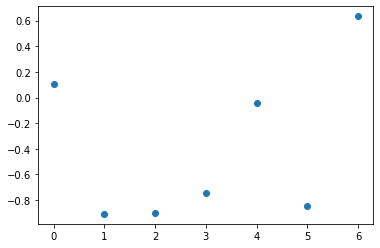

In [8]:
p = UniformPerson()

display(p.beliefs)

In [9]:
import itertools 

def population(SomePerson, N):
    return [SomePerson() for i in range(N)]

In [24]:
def flip(success_threshold):
    return np.random.rand() < success_threshold

def choose_topic(topics=generic_topics):
    topic_idx = np.random.choice(len(topics))
    return topics[topic_idx]

def rhetoric_wins(pair):
    u, v = pair
    return flip(u.rhetoric_ability)
        
def update(sophist, listener, topic, lr=0.05):
    direction = -1 if sophist.beliefs[topic] < 0 else 1
    listener.beliefs[topic] += direction * sophist.rhetoric_ability * lr 
    if listener.beliefs[topic] > 1:
        listener.beliefs[topic] = 1
    if listener.beliefs[topic] < -1:
        listener.beliefs[topic] = -1
    

In [25]:
def median_beliefs(population):
    median = np.median(np.array([np.array(list(p.beliefs.values())) for p in population]), axis=0)
    return dict(zip(generic_topics, median))

## Understand Population belief dynamics

This experiment generates a random sequence of individuals, bundles them into pairs, and picks a topic at random for the pair to discuss. 

In [26]:
N = 1000
num_events = N*N

pop = population(UniformPerson, N)

In [27]:
choices = np.random.choice(N, 2*num_events)
topic_sequence = np.random.choice(len(generic_topics), 2*num_events)

In [28]:
pairs = [(choices[i], choices[i+1]) for i in range(len(choices)-1) if choices[i] != choices[i+1]]

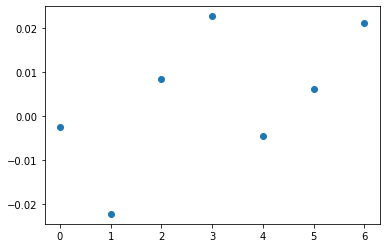

In [29]:
before = median_beliefs(pop)
display(before)

In [30]:
from tqdm import tqdm

for i, pair_index in tqdm(enumerate(choices)):
    i, j = pairs[pair_index]
    topic = generic_topics[topic_sequence[i]]
#     if rhetoric_wins((pop[i], pop[j])):
    update(pop[i], pop[j], topic)

2000000it [00:03, 537723.60it/s]


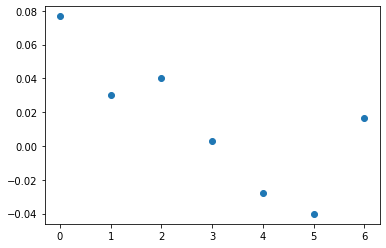

In [31]:
display(median_beliefs(pop))

## Watch one person's beliefs change 

In this experiment I watch a single person's beliefs change over time

In [32]:
socialite = UniformPerson()

In [33]:
N = 1
M = 1000 # discuss each topic M times
topic_sequence = M * generic_topics
pop = population(UniformPerson, len(topic_sequence))

In [34]:
beliefs_over_time = socialite.beliefs.copy()
beliefs_over_time = {k: [v] for k,v in beliefs_over_time.items()}
for _ in tqdm(range(N)):
    for i, other in enumerate(pop):
        t = topic_sequence[i]
        if rhetoric_wins((pop[i], pop[j])):
            update(sophist=other, listener=socialite, topic=t)
        beliefs_over_time[t].append(socialite.beliefs[t])

100%|██████████| 1/1 [00:00<00:00, 52.24it/s]


In [37]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

dataframes = [pd.DataFrame({'x': list(range(len(dist))), 'topic': [topic] * len(dist), 'Belief': dist}) 
              for topic, dist in beliefs_over_time.items()]
df = pd.concat(dataframes)

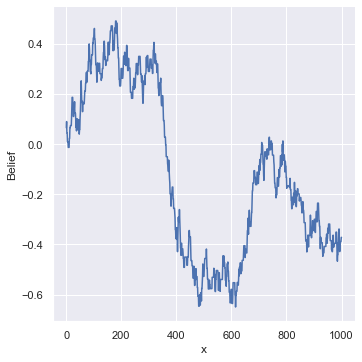

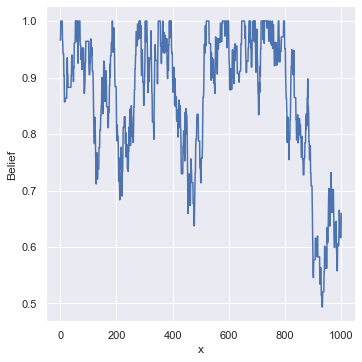

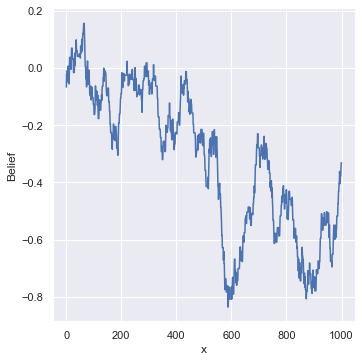

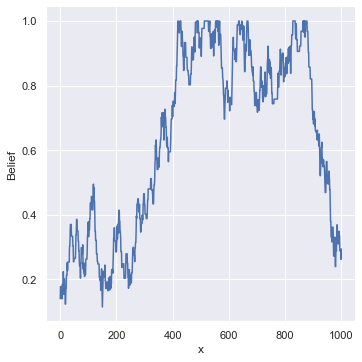

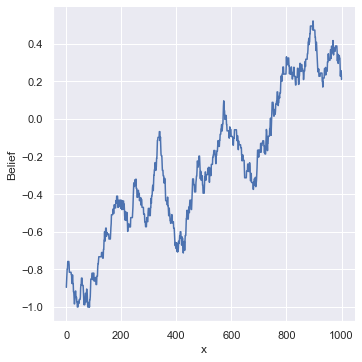

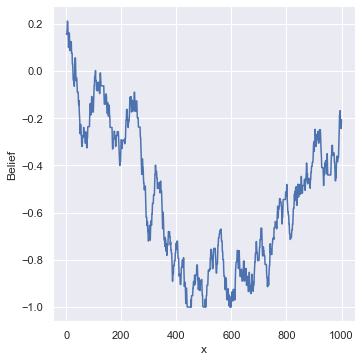

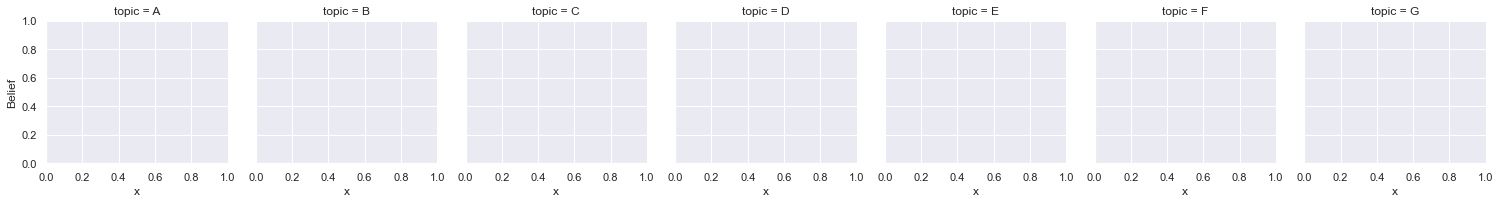

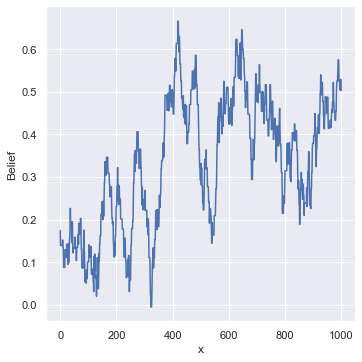

In [38]:
g = sns.FacetGrid(df, col="topic")
g.map(sns.relplot, "x", "Belief", kind="line")